Step 1. Importing required libraries.

In [1]:
#Importing all the required Packages
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from pylab import rcParams
import warnings
import numpy as np
warnings.filterwarnings("ignore")

Step 2. Loading ethereum dataset "eth.csv" into variable data and priniting a few rows to see how does data look like:

In [2]:
df = pd.read_csv("C:/Users/sivay/Downloads/btc_Data.csv")

In [3]:
df.head()
df.columns

Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMVRVCur', 'CapMrktCurUSD', 'CapRealUSD', 'DiffMean', 'FeeMeanNtv',
       'FeeMeanUSD', 'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD',
       'HashRate', 'IssContNtv', 'IssContPctAnn', 'IssContUSD', 'IssTotNtv',
       'IssTotUSD', 'NVTAdj', 'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr',
       'ROI30d', 'SplyCur', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv',
       'TxTfrValAdjUSD', 'TxTfrValMeanNtv', 'TxTfrValMeanUSD',
       'TxTfrValMedNtv', 'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD',
       'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

Step 3.1. Dropping all columns except "date" and "PriceUSD" based on which prediction can be done further. Changing the datatype of date to date and time 
Printing the data to see how it appears now.
.

In [4]:
df=df[['date','PriceUSD']]
df['date'] = pd.to_datetime(df['date'])

In [5]:
print(df.head())

        date  PriceUSD
0 2009-01-03       NaN
1 2009-01-04       NaN
2 2009-01-05       NaN
3 2009-01-06       NaN
4 2009-01-07       NaN


Step 3.2. Checking for null values and dropping them.

In [6]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107 entries, 0 to 4106
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      4107 non-null   datetime64[ns]
 1   PriceUSD  3546 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 64.3 KB
None


date          0
PriceUSD    561
dtype: int64

Results shows 9 values are missing for "PriceUSD". Upon checking the actual data in CSV file, it appears that first 9 consecutive values for "PriceUSD" are missing so best way to deal with it is to directly remove or drop these rows instead of imputing those missing places with mean or mode values.

In [7]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

After dropping the respective rows, it seems that now there are no missing values. 

In [8]:
df.head()

,date,PriceUSD
0,2010-07-18,0.085840
1,2010-07-19,0.080800
2,2010-07-20,0.074736
3,2010-07-21,0.079193
4,2010-07-22,0.058470


Step 3.3. Grouping on date

In [9]:
#Grouping the based on date so as to obtain the data for all the same dates one after the other 
df= df.groupby('date')
df.head()

,date,PriceUSD
0,2010-07-18,0.085840
1,2010-07-19,0.080800
2,2010-07-20,0.074736
3,2010-07-21,0.079193
4,2010-07-22,0.058470
...,...,...
3541,2020-03-28,6231.819890
3542,2020-03-29,5904.857587
3543,2020-03-30,6436.905700
3544,2020-03-31,6432.383242


Step 3.4. Making column "date" as the index of data.

In [10]:
#Adding the values of same dates together and resetting the index for the resultant table
df=df['PriceUSD'].sum().reset_index()

In [11]:
#Since time series required to be indexed with respect to datastamp, setting date as the index for the DataFrame
df=df.set_index('date')

In [12]:
df.head()
df.index

DatetimeIndex(['2010-07-18', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23', '2010-07-24', '2010-07-25',
               '2010-07-26', '2010-07-27',
               ...
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
               '2020-03-31', '2020-04-01'],
              dtype='datetime64[ns]', name='date', length=3546, freq=None)

In [13]:
#Resampling the sales date by taking the mean of all the sales for a particular month 
#and assigning the values to first date of the month
y = df['PriceUSD']


Step 4.1. In this step, the plot has been drawn to visually see the distribution of data over the years. Needless to say, 2018 has the huge spike in "PriceUSD" whereas less variation has observed from 2016 to 2017 and 2019 to 2020.

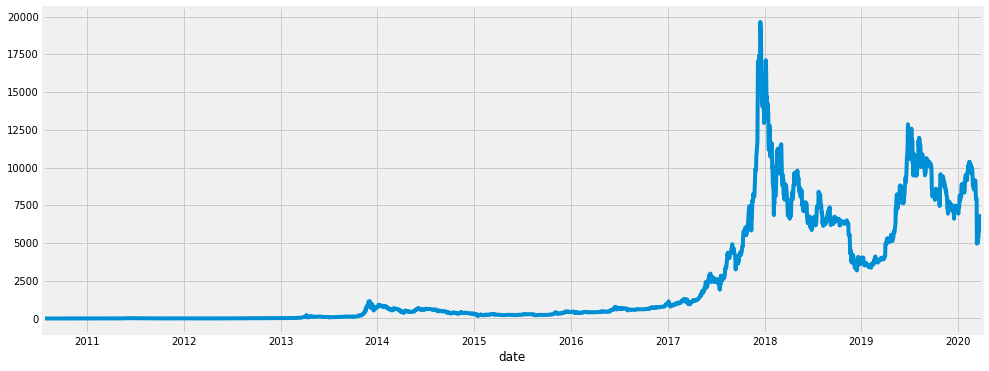

In [14]:
#Plotting the time series plot
y.plot(figsize=(15, 6))
plt.show()

Decomposing the above obtained time series into its subcomponents namely (Observed,Trend,Seasonal,Residual)

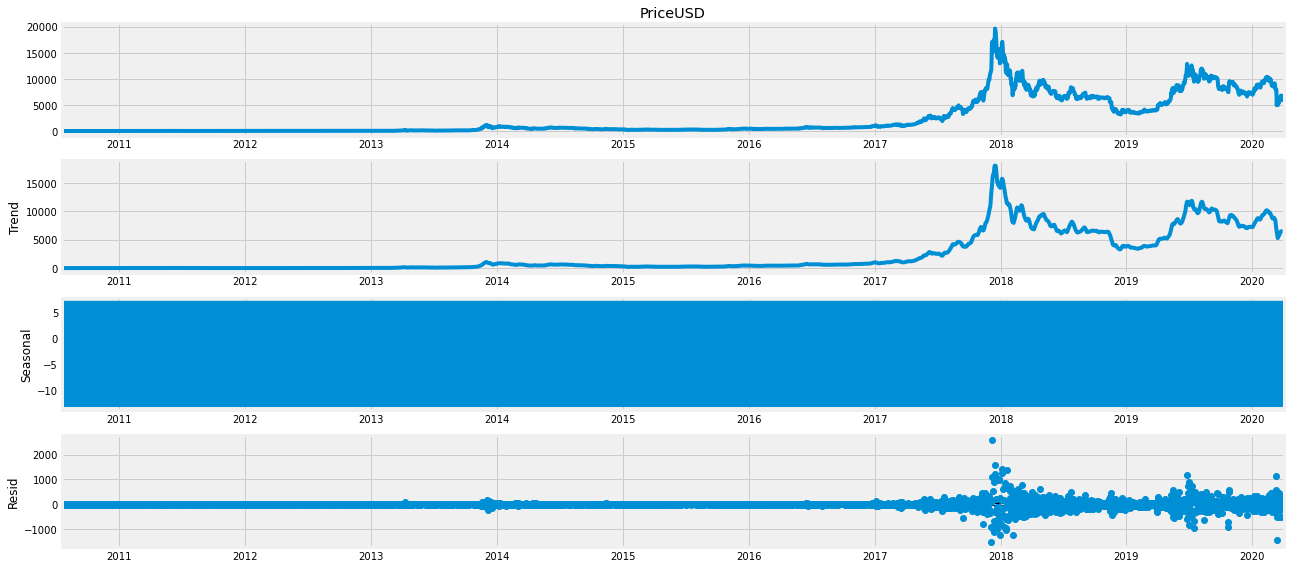

In [15]:
#Decomposing the above obtained time series into its subcomponents namely (Observed,Trend,Seasonal,Residual)
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()
#Observed - Plot shows the original time series plot
#Trend  - Plot shows how the data varies over period of time 
#Below Trend graph we can observe there is no fixed trend pattern
#Seasonal - Plot shows how the data varies seasonally
#Below Seasonal plot shows that there is increase of sales every year end and it falls back at the start of the year
#Residual - Plot shows any left over abnormalities after seperating Trend and Seasonal patterns from original data
#Below Residual plot shows there exists abnormalities but no defined pattern can be observed

Step 5. Check Seasonality and Trend for Stationarity.

        Plotting Original data along with rolling mean and rolling standard deviation would help to visually see if the series is stationary or not.

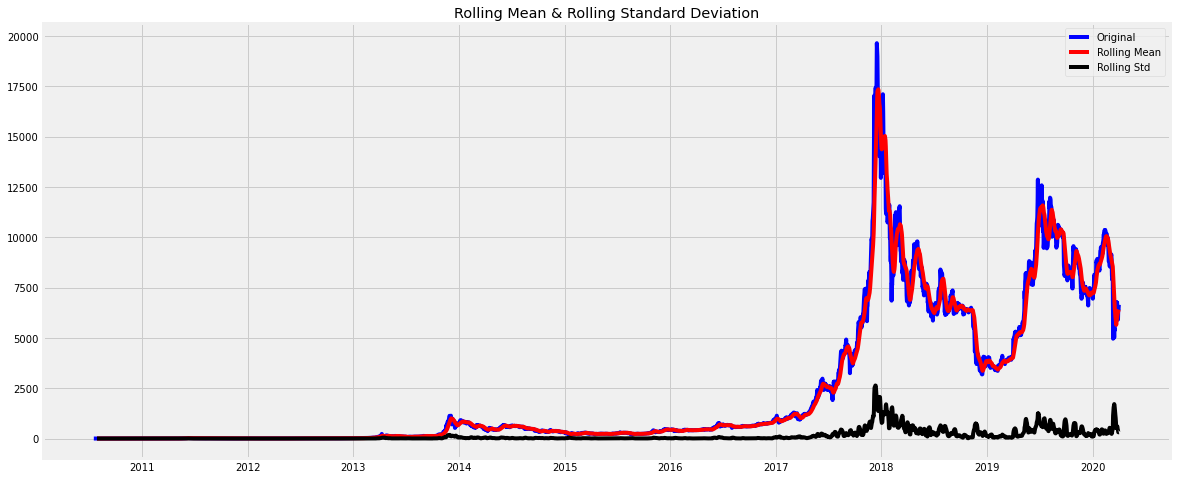

In [16]:
#Plotting Rolling mean and Rolling Standard deviation of our original series
rolling_mean= y.rolling(window=12).mean()
rolling_std= y.rolling(window=12).std()
plt.plot(y, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

Plot clearly shows that the series is not stationary because it

     1. Does not have constant mean and
     2. Does not have constant standard deviation
     
To re-check and get the p-value, let's perform Dickey-Fuller test along with plotting the seasonal decomposition of the data to see "Trend", "Residual" and "Seasonality" of the series. 

In [17]:
#Augmented Dickey–Fuller test
#Another approach for finding the differentiation term is Augmented Dickey–Fuller test.
#This test takes Null Hypothesis as the series to be not stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.719561
p-value: 0.421063


Dickey-Fuller test confirms that the series is not stationary because p=0.158459 which is more than 0.05. 

To make series stationary, let's perform the differencing of data followed by dropping null value as for first value in the table there is no value to have differencing with. This results in having NaN. Once this is done, let's perform Dickey-Fullet test again to see if p-value is significant.

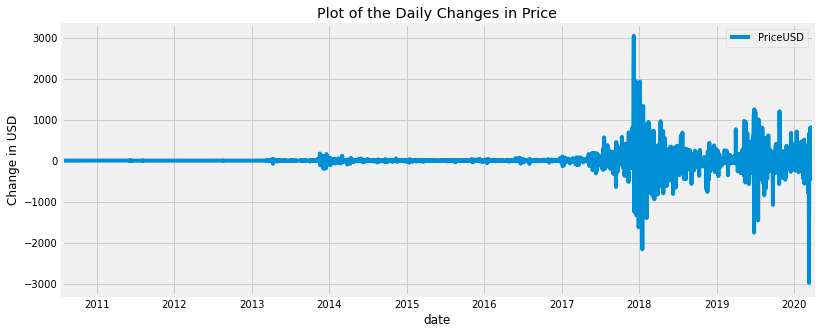

In [18]:
# Differencing the price
df_diff =df.diff(1).dropna()
# Plotting the differences daily
df_diff.plot(figsize=(12,5))
plt.title('Plot of the Daily Changes in Price')
plt.ylabel('Change in USD')
plt.show()

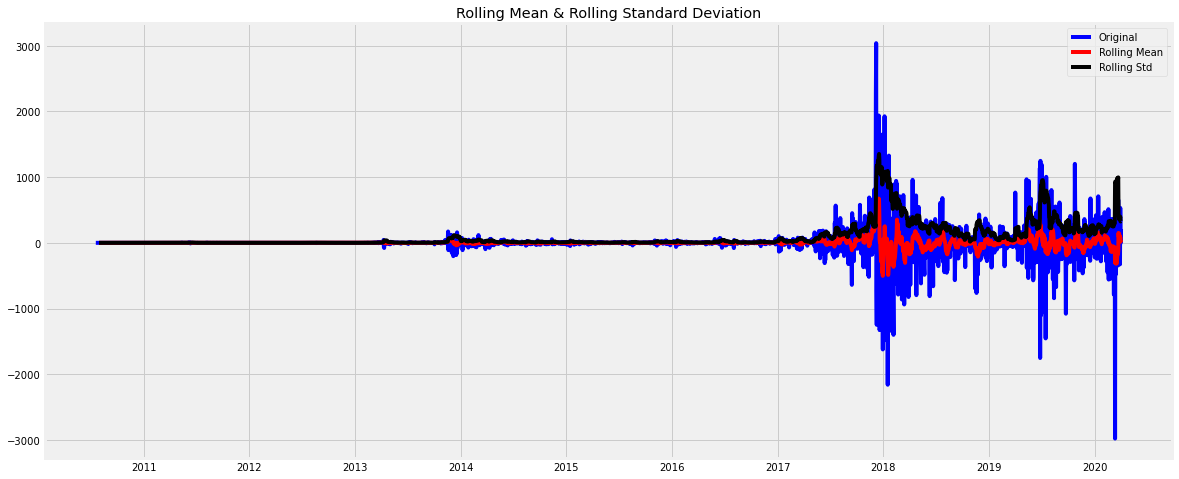

In [19]:
#Plotting Rolling mean and Rolling Standard deviation of our original series
rolling_mean=df_diff.rolling(window=12).mean()
rolling_std= df_diff.rolling(window=12).std()
plt.plot(df_diff, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

Here the rolling mean and varience are almost stationary.

In [20]:
#Augmented Dickey–Fuller test
#Another approach for finding the differentiation term is Augmented Dickey–Fuller test.
#This test takes Null Hypothesis as the series to be not stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -11.493205
p-value: 0.000000


Finding the p,q values using ACF and PACF

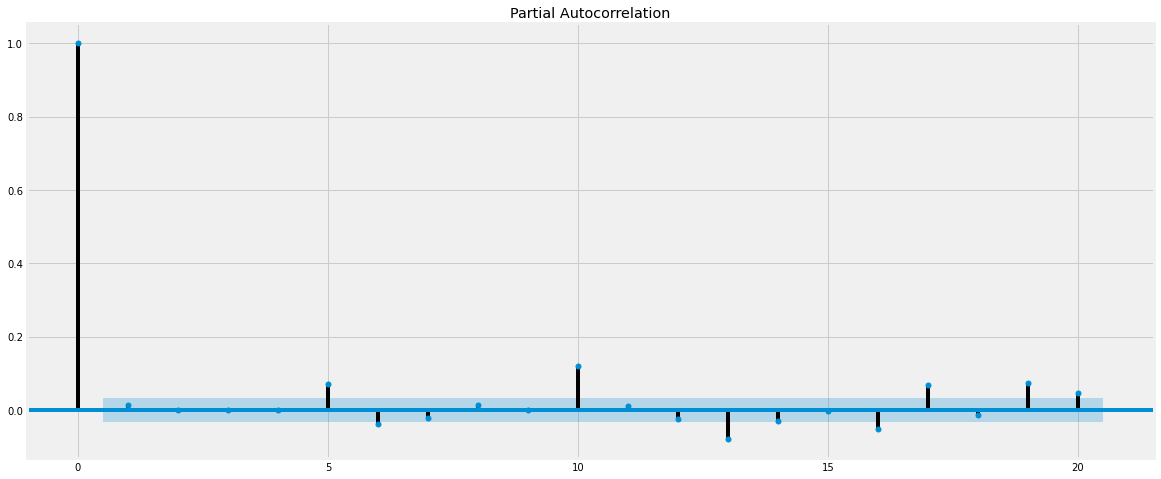

In [21]:

from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(df_diff.PriceUSD,lags=20)
plt.show()

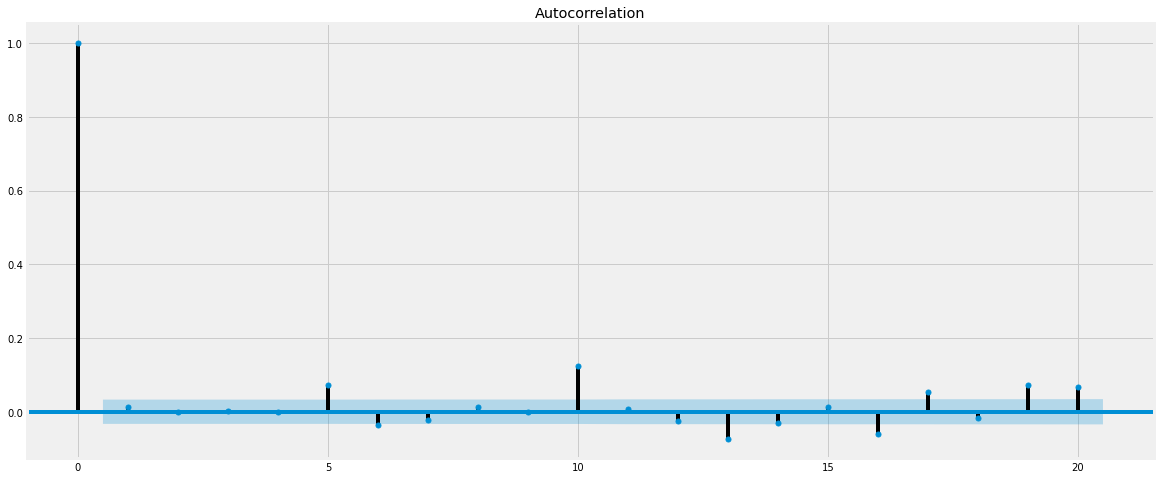

In [22]:
plot_acf(df_diff.PriceUSD,lags=20)
plt.show()

From this we can understand that value 0 or 1 can be chosen as the p,q values

In [23]:
!pip install pmdarima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

Building the model with the pdq values with no seasonality

In [24]:
modelN = pm.auto_arima(y, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(modelN.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=48011.779, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=48013.075, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=48013.077, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=48010.059, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=48015.077, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.376 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3546
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -24004.029
Date:                Thu, 29 Oct 2020   AIC                          48010.059
Time:                        15:40:41   BIC                          48016.232
Sample:                             0   HQIC                         48012.261
                               - 3546                                  

Plotting the model

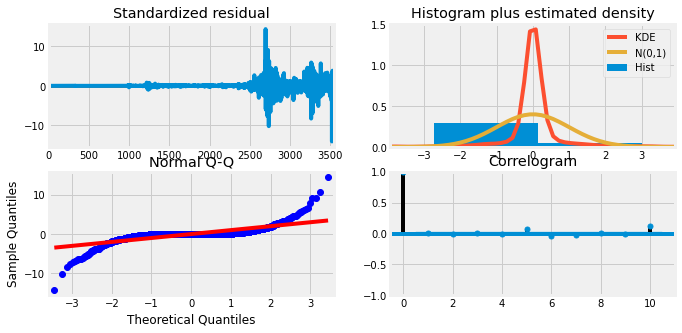

In [25]:
modelN.plot_diagnostics(figsize=(10,5))
plt.show()

Making predictions using the model

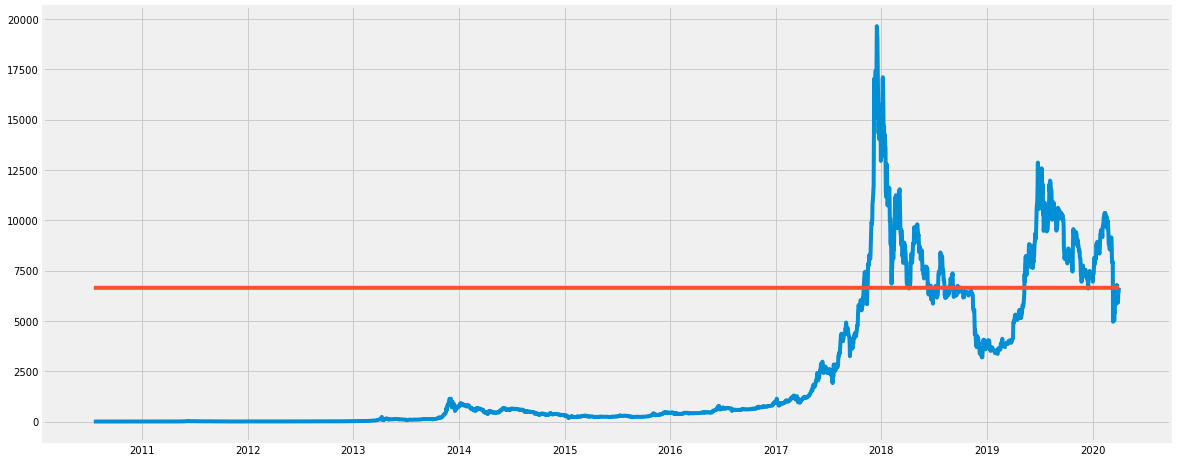

In [26]:
forecast=modelN.predict(n_periods=len(y))
forecast = pd.DataFrame(forecast,index = y.index,columns=['Prediction'])
forecast
plt.plot(y)
plt.plot(forecast)
plt.show()

SARIMAx

In [27]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

Finding the hyperparameters for SARIMAX model - pdq seasonality and external variables

In [28]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:69273.50616279634
ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:64873.90742544651
ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:54999.08987005195
ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:54883.28536867643
ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:55006.36450289238
ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:54975.61889034768
ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:54898.868231072374
ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:54876.97589429982
ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:66731.25363721338
ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:61006.64122880587
ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:52385.340930010156
ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:52257.61825646337
ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:52400.675419444706
ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:65786.31443401208
ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:52286.20765076302
ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:52259.545624989405
ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:47997.51662852109
ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC:47909.755788873
ARIMA(0, 1, 0)x(0, 1, 0, 7) - AIC:50435.00218160104
ARIMA(0, 1

Building model using the best parameters

In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=True,
                                simple_differencing=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          PriceUSD   No. Observations:                 3546
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -23977.585
Date:                           Thu, 29 Oct 2020   AIC                          47963.169
Time:                                   16:05:20   BIC                          47987.854
Sample:                               07-18-2010   HQIC                         47971.974
                                    - 04-01-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0142      0.005      3.058      0.002       0.005       0.023
ar.S.L7       -0.0232      0.006     -3.964

In [42]:
results

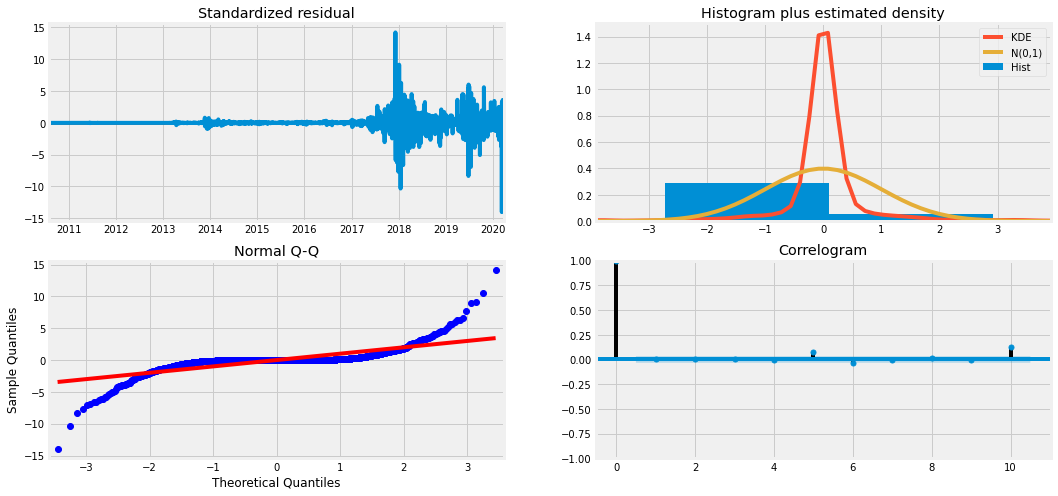

In [43]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Making predictions of the actual data

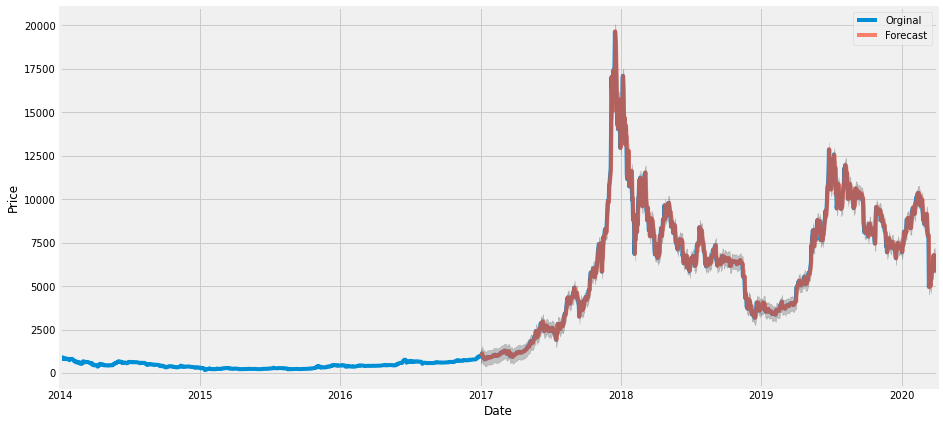

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Orginal')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

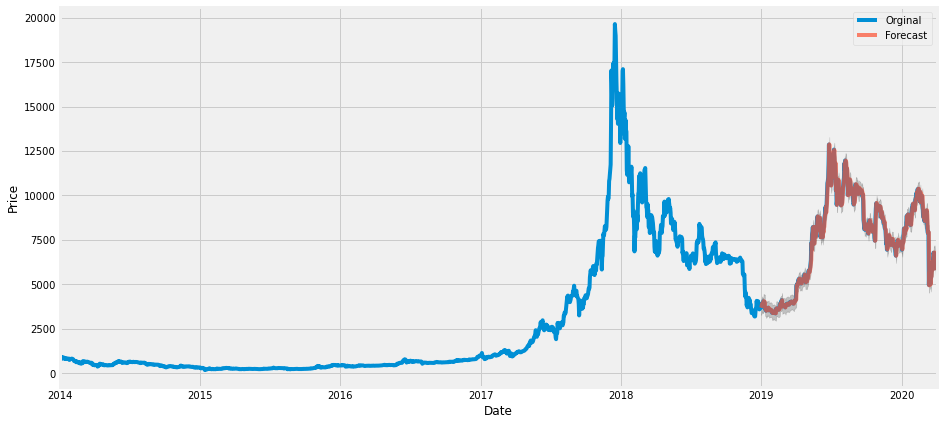

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Orginal')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

Making future predictions

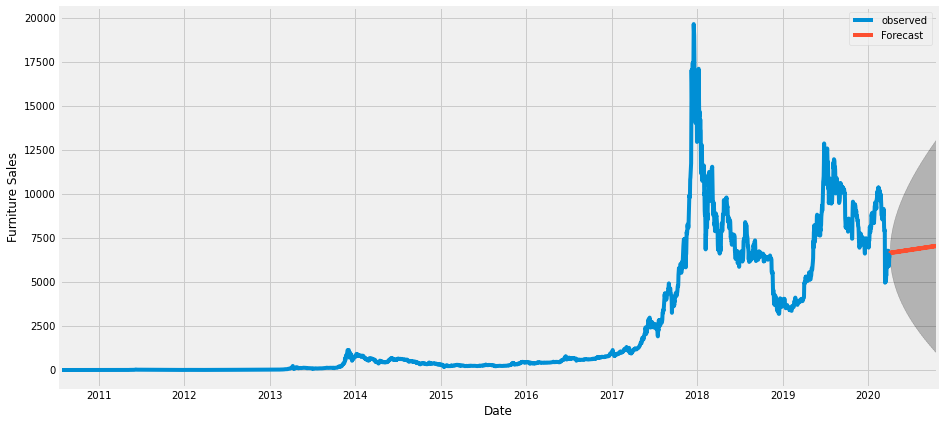

In [54]:
pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Getting the values of future 7 days

In [55]:
from datetime import datetime, timedelta
df['Forecast2'] = results.predict(start=datetime(2018,12,31), end=datetime(2020,4,8))

In [56]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+ DateOffset(days=x) for x in range(0,7)]

In [57]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [58]:
future_df = pd.concat([df, future_dates_df])

In [61]:
future_df['Forecast'] = results.predict(start=datetime(2020,4,1), end=datetime(2020,4,8), dynamic = True)

In [62]:
future_df['Forecast'].tail(7)

2#6652.87

2020-04-01    6430.921463
2020-04-02    6412.716704
2020-04-03    6442.490970
2020-04-04    6457.555278
2020-04-05    6457.399160
2020-04-06    6456.539724
2020-04-07    6453.821909
Name: Forecast, dtype: float64